In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import random
import seaborn as sns
data = pd.read_csv("Case_Historicals.csv")
data = data[["W","AOD","Alcohol/Drugs","Heart","Lung",
             "Spine","Arthritis","Schizophrenia","Anxiety",
             "Depression","Hands","Vision","Hearing","Diabetes",
             "Stomach","Skilled","Semiskilled","HS","StrengthMedium","StrengthSedentary"]]#,"IQ"
data

,W,AOD,Alcohol/Drugs,Heart,Lung,Spine,Arthritis,Schizophrenia,Anxiety,Depression,Hands,Vision,Hearing,Diabetes,Stomach,Skilled,Semiskilled,HS,StrengthMedium,StrengthSedentary
0,1,50,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,31,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
3,1,34,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,1,61,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0
5,0,38,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0
6,0,26,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
7,0,31,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1
8,1,54,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0
9,0,39,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0


In [51]:
train = data[:round(.75*len(data))]
test = data[round(.75*len(data)):]

In [52]:
y = train.W
x = sm.add_constant(train[train.columns[1:]])
logit_model = sm.GLM(np.array(y), np.array(x), family=sm.families.Binomial())
results = logit_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   31
Model:                            GLM   Df Residuals:                       13
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8.4445
Date:                Wed, 30 Dec 2020   Deviance:                       16.889
Time:                        12:37:51   Pearson chi2:                     20.2
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9732      5.349      0.556      0.578      -7.510      13.456
x1            -0.0355      0.120     -0.296      0.767      -0.270       0.199
x2            -4.2683      3.503     -1.219      0.223     -11.134       2.597
x3            -0.6508      1.387     -0.469      0.639      -3.369       2.067
x4            -0.6508      1.387     -0.469      0.639      -3.369       2.067
x5             3.8710      2.261      1.712      0.087      -0.560       8.302
x6             5.2115      2.313      2.253      0.024       0.678       9.745
x7           -16.5366   1.68e+04     -0.001      0.999    -3.3e+04    3.29e+04
x8             0.4002      2.488      0.161      0.872      -4.476       5.277
x9             1.5446      2.349      0.658      0.511      -3.059       6.148
x10            1.2539      2.551      0.492      0.623      -3.745       6.253
x11            4.7374      4.191      1.130      0.258      -3.476      12.951
x12           -2.6627   1.69e+04     -0.000      1.000   -3.31e+04     3.3e+04
x13           -2.6627   1.69e+04     -0.000      1.000   -3.31e+04     3.3e+04
x14           25.3387   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
x15            3.1661      4.179      0.758      0.449      -5.024      11.356
x16            4.7997      3.734      1.285      0.199      -2.519      12.119
x17          -10.5961      5.692     -1.861      0.063     -21.753       0.561
x18           -0.4678      3.582     -0.131      0.896      -7.489       6.553
x19          -19.5867   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
==============================================================================
"""

In [203]:
p = (results.predict(sm.add_constant(test[test.columns[1:]])))

In [204]:
prob = []
for x in p:
    prob.append(round(x,3))
prob
W = []
for x in prob:
    if x > .5:
        W.append(1)
    else:
        W.append(0)
print("Prediction | Actual")
for i in range(len(W)):
    print("    ",W[i],"    |   ",test.W[i+31])

Prediction | Actual
     0     |    1
     1     |    1
     0     |    0
     1     |    1
     1     |    0
     1     |    1
     1     |    0
     1     |    0
     0     |    1
     0     |    0


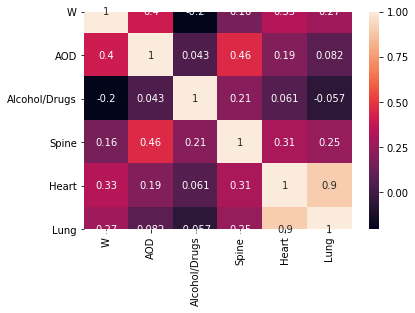

In [170]:
corrMatrix = data[["W","AOD","Alcohol/Drugs","Spine","Heart","Lung"]].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

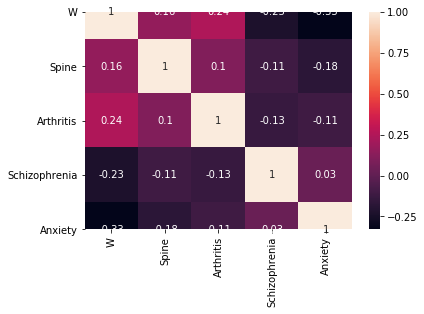

In [171]:
corrMatrix = data[["W","Spine","Arthritis","Schizophrenia","Anxiety"]].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

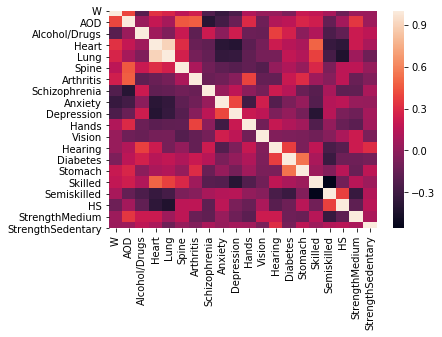

In [214]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

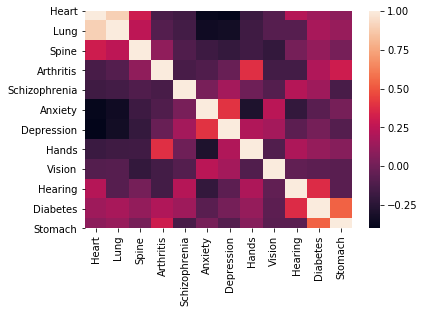

In [173]:
corrMatrix = data[["Heart","Lung",
             "Spine","Arthritis","Schizophrenia","Anxiety",
             "Depression","Hands","Vision","Hearing","Diabetes",
             "Stomach"]].corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

In [174]:
pseudo_R = (results.llf - results.llnull) / -results.llnull
round(pseudo_R,5)

0.59945

In [195]:
def ScreenPNC():
    AOD = input("Enter the PNC's age in years: ")
    while 0 < 1:
        try:
            float(AOD)
            break
        except:
            print("Couldn't interpret your entry. Try answering again.")
            AOD = input("Enter the PNC's age in years: ")
    DrugAlc = input("Does the PNC have a history of drug or alcohol abuse? (Y/N) ")
    while DrugAlc not in ("Y","N"):
        print("Couldn't interpret your entry. Try answering again.")
        DrugAlc = input("Does the PNC have a history of drug or alcohol abuse? (Y/N) ")
    conditions = ["Heart","Lung","Spine","Arthritis","Schizophrenia","Anxiety","Depression",
                  "Hands","Vision","Hearing","Diabetes","Stomach"]
    varDict = pd.DataFrame(columns = ["W","AOD","Alcohol/Drugs","Heart","Lung",
             "Spine","Arthritis","Schizophrenia","Anxiety",
             "Depression","Hands","Vision","Hearing","Diabetes",
             "Stomach","Skilled","Semiskilled","HS","StrengthMedium","StrengthSedentary"])
    varDict.W = [0]
    varDict["AOD"] = [int(AOD)]
    varDict["Alcohol/Drugs"] = [1] if DrugAlc == "Y" else [0]
    for x in conditions:
        ent = input("Does the PNC have issues with "+x+"? (Y/N) ")
        while ent not in ("Y","N"):
            print("Couldn't interpret your entry. Try answering again.")
            ent = input("Does the PNC have issues with "+x+"? (Y/N) ")
        varDict[x] = [1] if ent == "Y" else [0]
    Skilled = input("Has the PNC ever had a skilled job? (Y/N) ")
    while Skilled not in ("Y","N"):
        print("Couldn't interpret your entry. Try answering again.")
        Skilled = input("Has the PNC ever had a skilled job? (Y/N) ")
    if Skilled == "Y":
        varDict["Skilled"] = [1]
        varDict["Semiskilled"] = [0]
    else:
        SemiSkilled = input("Has the PNC ever had a semi-skilled job? (Y/N) ")
        while SemiSkilled not in ("Y","N"):
            print("Couldn't interpret your entry. Try answering again.")
            SemiSkilled = input("Has the PNC ever had a semi-skilled job? (Y/N) ")
        if SemiSkilled == "Y":
            varDict["Skilled"] = [0]
            varDict["Semiskilled"] = [1]
        else:
            varDict["Skilled"] = [0]
            varDict["Semiskilled"] = [0]
    HS = input("Has the PNC completed high school? (Y/N) ")
    while HS not in ("Y","N"):
        print("Couldn't interpret your entry. Try answering again.")
        HS = input("Has the PNC completed high school? (Y/N) ")
    varDict["HS"] = [1] if HS == "Y" else [0]
    Sedentary = input("Has the PNC ever had a sedentary job? (Y/N) ")
    while Skilled not in ("Y","N"):
        print("Couldn't interpret your entry. Try answering again.")
        Sedentary = input("Has the PNC ever had a sedentary job? (Y/N) ")
    if Sedentary == "Y":
        varDict["StrengthSedentary"] = [1]
        varDict["StrengthMedium"] = [0]
    else:
        Medium = input("Has the PNC ever had a moderate labor job? (Y/N) ")
        while Medium not in ("Y","N"):
            print("Couldn't interpret your entry. Try answering again.")
            Medium = input("Has the PNC ever had a moderate labor job? (Y/N) ")
        if Medium == "Y":
            varDict["StrengthSedentary"] = [0]
            varDict["StrengthMedium"] = [1]
        else:
            varDict["StrengthSedentary"] = [0]
            varDict["StrengthMedium"] = [0]
    prob = results.predict(sm.add_constant(varDict[varDict.columns]))
    print("The PNC's probability of having a successful claim is "+ str(round(100*prob[0],2)) + "%.")

In [251]:
ScreenPNC()

Enter the PNC's age in years: 32
Does the PNC have a history of drug or alcohol abuse? (Y/N) N
Does the PNC have issues with Heart? (Y/N) N
Does the PNC have issues with Lung? (Y/N) N
Does the PNC have issues with Spine? (Y/N) N
Does the PNC have issues with Arthritis? (Y/N) N
Does the PNC have issues with Schizophrenia? (Y/N) Y
Does the PNC have issues with Anxiety? (Y/N) Y
Does the PNC have issues with Depression? (Y/N) Y
Does the PNC have issues with Hands? (Y/N) N
Does the PNC have issues with Vision? (Y/N) N
Does the PNC have issues with Hearing? (Y/N) N
Does the PNC have issues with Diabetes? (Y/N) N
Does the PNC have issues with Stomach? (Y/N) N
Has the PNC ever had a skilled job? (Y/N) N
Has the PNC ever had a semi-skilled job? (Y/N) N
Has the PNC completed high school? (Y/N) N
Has the PNC ever had a sedentary job? (Y/N) Y
The PNC's probability of having a successful claim is 0.0%.
